In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2510000e040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x25089087040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=64),#,activation='relu'),
    keras.layers.Dense(units=64,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 32, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 399,361
Trainable params: 399,361
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=375,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/375
2971/2971 [==============================] - 77s 23ms/step - loss: 0.1937 - accuracy: 0.7358 - val_loss: 0.1853 - val_accuracy: 0.7530
Epoch 2/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1909 - accuracy: 0.7393 - val_loss: 0.1834 - val_accuracy: 0.7530
Epoch 3/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1876 - accuracy: 0.7393 - val_loss: 0.1789 - val_accuracy: 0.7530
Epoch 4/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1810 - accuracy: 0.7401 - val_loss: 0.1724 - val_accuracy: 0.7529
Epoch 5/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1754 - accuracy: 0.7420 - val_loss: 0.1678 - val_accuracy: 0.7541
Epoch 6/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1718 - accuracy: 0.7411 - val_loss: 0.1659 - val_accuracy: 0.7512
Epoch 7/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1703 - accuracy: 0.7404 - val_loss: 0

2971/2971 [==============================] - 66s 22ms/step - loss: 0.1559 - accuracy: 0.7576 - val_loss: 0.1546 - val_accuracy: 0.7637
Epoch 57/375
2971/2971 [==============================] - 65s 22ms/step - loss: 0.1557 - accuracy: 0.7580 - val_loss: 0.1525 - val_accuracy: 0.7628
Epoch 58/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1557 - accuracy: 0.7583 - val_loss: 0.1532 - val_accuracy: 0.7624
Epoch 59/375
2971/2971 [==============================] - 65s 22ms/step - loss: 0.1555 - accuracy: 0.7583 - val_loss: 0.1528 - val_accuracy: 0.7631
Epoch 60/375
2971/2971 [==============================] - 65s 22ms/step - loss: 0.1554 - accuracy: 0.7584 - val_loss: 0.1521 - val_accuracy: 0.7644
Epoch 61/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1552 - accuracy: 0.7590 - val_loss: 0.1528 - val_accuracy: 0.7632
Epoch 62/375
2971/2971 [==============================] - 65s 22ms/step - loss: 0.1551 - accuracy: 0.7590 - val_loss: 0.1524 

2971/2971 [==============================] - 66s 22ms/step - loss: 0.1505 - accuracy: 0.7692 - val_loss: 0.1483 - val_accuracy: 0.7724
Epoch 112/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1504 - accuracy: 0.7694 - val_loss: 0.1495 - val_accuracy: 0.7723
Epoch 113/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1503 - accuracy: 0.7694 - val_loss: 0.1476 - val_accuracy: 0.7738
Epoch 114/375
2971/2971 [==============================] - 68s 23ms/step - loss: 0.1503 - accuracy: 0.7694 - val_loss: 0.1474 - val_accuracy: 0.7743
Epoch 115/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1502 - accuracy: 0.7695 - val_loss: 0.1478 - val_accuracy: 0.7737
Epoch 116/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1501 - accuracy: 0.7698 - val_loss: 0.1474 - val_accuracy: 0.7738
Epoch 117/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1500 - accuracy: 0.7701 - val_loss: 0

2971/2971 [==============================] - 66s 22ms/step - loss: 0.1473 - accuracy: 0.7758 - val_loss: 0.1456 - val_accuracy: 0.7785
Epoch 167/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1472 - accuracy: 0.7756 - val_loss: 0.1457 - val_accuracy: 0.7782
Epoch 168/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1472 - accuracy: 0.7756 - val_loss: 0.1451 - val_accuracy: 0.7789
Epoch 169/375
2971/2971 [==============================] - 66s 22ms/step - loss: 0.1472 - accuracy: 0.7753 - val_loss: 0.1458 - val_accuracy: 0.7772
Epoch 170/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1471 - accuracy: 0.7756 - val_loss: 0.1456 - val_accuracy: 0.7778
Epoch 171/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1471 - accuracy: 0.7760 - val_loss: 0.1455 - val_accuracy: 0.7779
Epoch 172/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1471 - accuracy: 0.7759 - val_loss: 0

2971/2971 [==============================] - 68s 23ms/step - loss: 0.1448 - accuracy: 0.7792 - val_loss: 0.1436 - val_accuracy: 0.7811
Epoch 222/375
2971/2971 [==============================] - 68s 23ms/step - loss: 0.1447 - accuracy: 0.7792 - val_loss: 0.1438 - val_accuracy: 0.7811
Epoch 223/375
2971/2971 [==============================] - 68s 23ms/step - loss: 0.1447 - accuracy: 0.7794 - val_loss: 0.1432 - val_accuracy: 0.7814
Epoch 224/375
2971/2971 [==============================] - 67s 23ms/step - loss: 0.1447 - accuracy: 0.7795 - val_loss: 0.1432 - val_accuracy: 0.7806
Epoch 225/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1447 - accuracy: 0.7795 - val_loss: 0.1442 - val_accuracy: 0.7806
Epoch 226/375
2971/2971 [==============================] - 68s 23ms/step - loss: 0.1446 - accuracy: 0.7794 - val_loss: 0.1434 - val_accuracy: 0.7810
Epoch 227/375
2971/2971 [==============================] - 67s 22ms/step - loss: 0.1446 - accuracy: 0.7796 - val_loss: 0

2971/2971 [==============================] - 75s 25ms/step - loss: 0.1434 - accuracy: 0.7813 - val_loss: 0.1433 - val_accuracy: 0.7815
Epoch 277/375
2971/2971 [==============================] - 74s 25ms/step - loss: 0.1434 - accuracy: 0.7814 - val_loss: 0.1427 - val_accuracy: 0.7821
Epoch 278/375
2971/2971 [==============================] - 75s 25ms/step - loss: 0.1433 - accuracy: 0.7815 - val_loss: 0.1431 - val_accuracy: 0.7815
Epoch 279/375
2971/2971 [==============================] - 76s 26ms/step - loss: 0.1433 - accuracy: 0.7814 - val_loss: 0.1432 - val_accuracy: 0.7830
Epoch 280/375
2971/2971 [==============================] - 75s 25ms/step - loss: 0.1433 - accuracy: 0.7815 - val_loss: 0.1443 - val_accuracy: 0.7793
Epoch 281/375
2971/2971 [==============================] - 74s 25ms/step - loss: 0.1433 - accuracy: 0.7814 - val_loss: 0.1434 - val_accuracy: 0.7812
Epoch 282/375
2971/2971 [==============================] - 74s 25ms/step - loss: 0.1432 - accuracy: 0.7821 - val_loss: 0

2971/2971 [==============================] - 72s 24ms/step - loss: 0.1422 - accuracy: 0.7833 - val_loss: 0.1426 - val_accuracy: 0.7843
Epoch 332/375
2971/2971 [==============================] - 73s 24ms/step - loss: 0.1421 - accuracy: 0.7831 - val_loss: 0.1429 - val_accuracy: 0.7820
Epoch 333/375
2971/2971 [==============================] - 74s 25ms/step - loss: 0.1421 - accuracy: 0.7834 - val_loss: 0.1426 - val_accuracy: 0.7833
Epoch 334/375
2971/2971 [==============================] - 75s 25ms/step - loss: 0.1421 - accuracy: 0.7834 - val_loss: 0.1441 - val_accuracy: 0.7799
Epoch 335/375
2971/2971 [==============================] - 74s 25ms/step - loss: 0.1421 - accuracy: 0.7835 - val_loss: 0.1422 - val_accuracy: 0.7853
Epoch 336/375
2971/2971 [==============================] - 73s 25ms/step - loss: 0.1421 - accuracy: 0.7833 - val_loss: 0.1431 - val_accuracy: 0.7823
Epoch 337/375
2971/2971 [==============================] - 73s 24ms/step - loss: 0.1420 - accuracy: 0.7834 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 34s 11ms/step


In [25]:
stop=t.time()-start
print(stop)

25961.451864004135


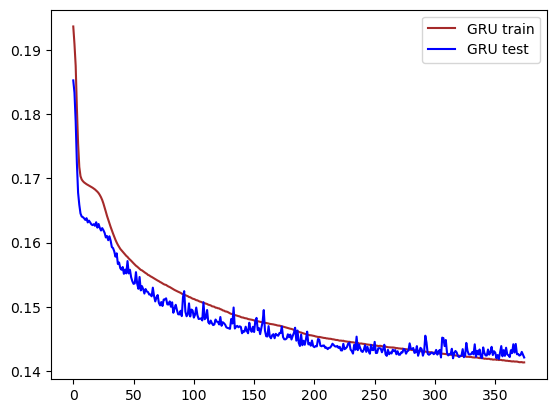

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.00403652],
       [0.00961612],
       [0.00415242],
       ...,
       [0.04745489],
       [0.04842403],
       [0.04955864]], dtype=float32)

In [31]:
pred_y=np.reshape(pred_y,95061)

0.14208831762541974
0.2359584110585472
0.3769460407345058
0.28102852805377126


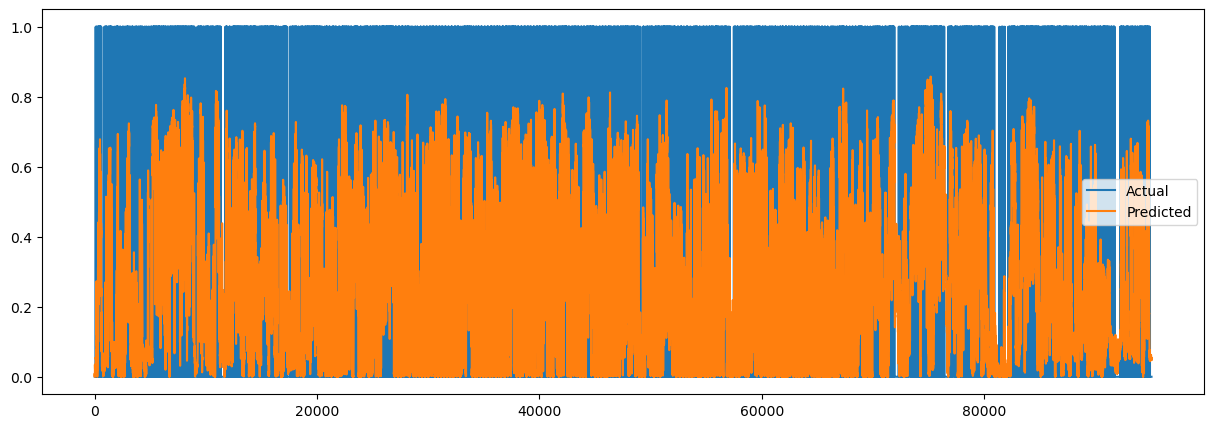

In [32]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [33]:
np.shape(train_X)

(380244, 32, 15)

In [34]:
np.shape(train_y)

(380244, 1)

In [35]:
np.shape(test_X)

(95061, 32, 15)

In [36]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 132s 9ms/step


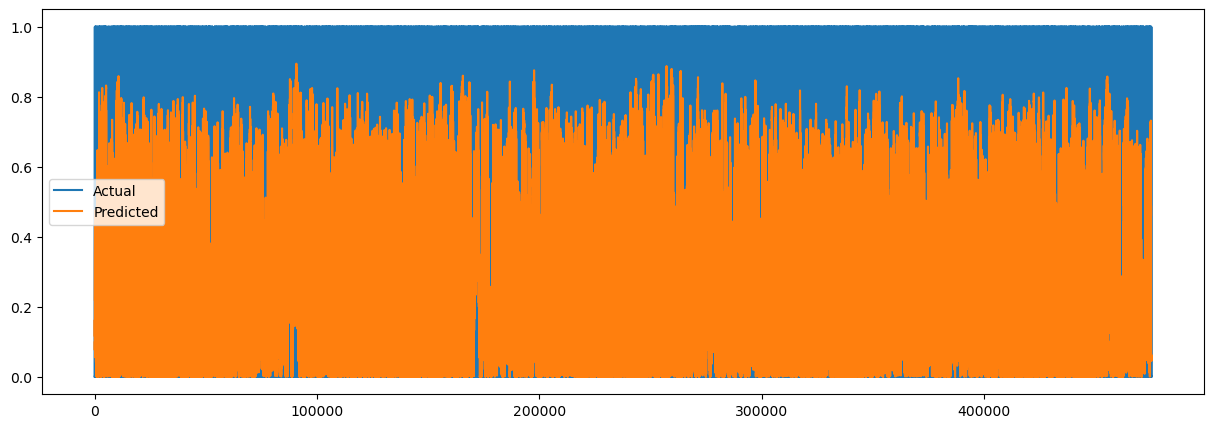

In [37]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

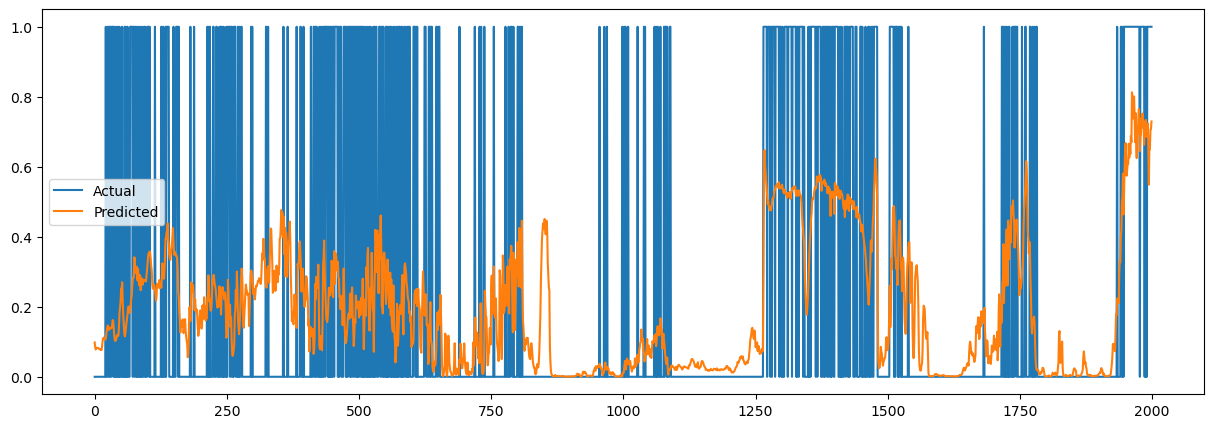

In [38]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [39]:
print(sum(tes)/len(tes))

[0.25795437]


In [40]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.61976874]
[0.82104993]
total acc [0.78497596]


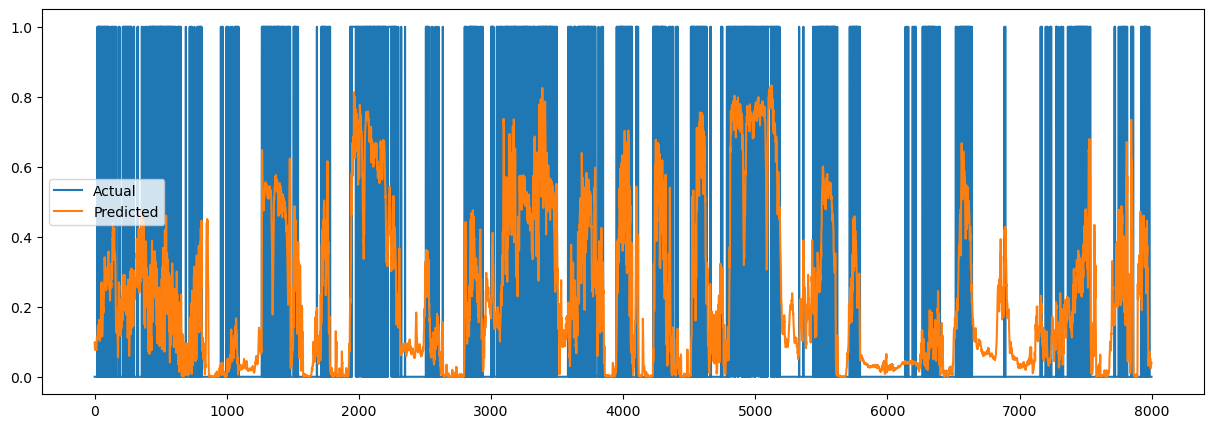

In [41]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

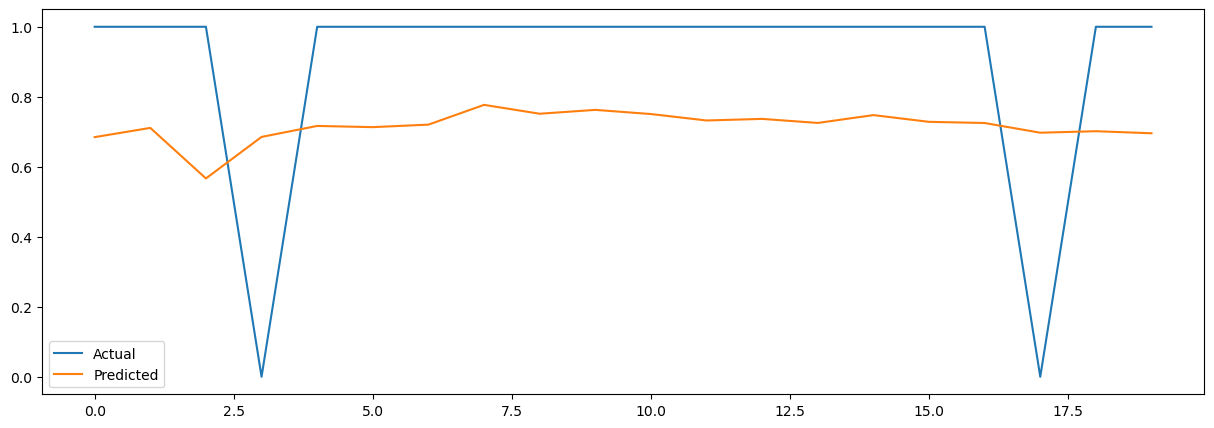

In [42]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

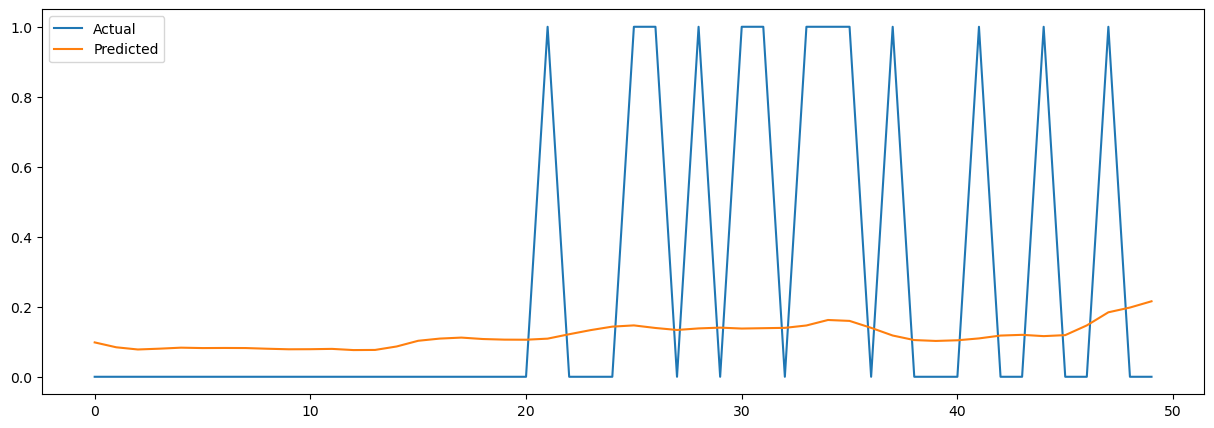

In [43]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

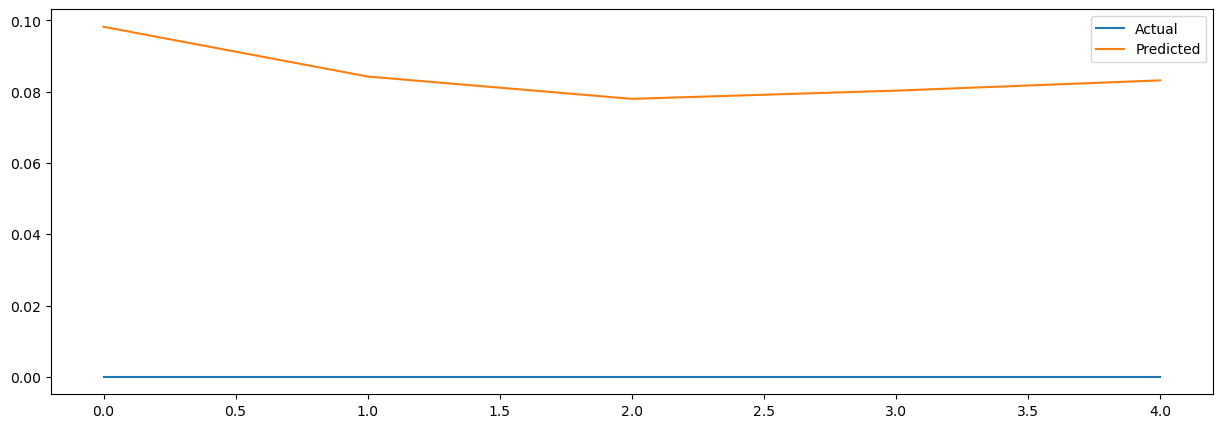

In [44]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()